In [65]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
plt.rc('font', family='NanumGothic')

In [2]:
files = glob('seoul_data/*.csv')
files

['seoul_data\\sales_summary_data_20214q.csv',
 'seoul_data\\test.csv',
 'seoul_data\\상권_추정매출.csv(2017_2021).csv',
 'seoul_data\\상권배후지_소득소비.csv',
 'seoul_data\\서울_상권_점포_수.csv',
 'seoul_data\\서울_상주배후지_상주인구.csv',
 'seoul_data\\서울특별시_상권배후지_생활인구.csv',
 'seoul_data\\서울특별시_상권배후지_아파트.csv',
 'seoul_data\\서울특별시_상권배후지_직장인구.csv',
 'seoul_data\\서울특별시_상권배후지_집객시설.csv',
 'seoul_data\\서울특별시_행정동별_상권변화지표.csv',
 'seoul_data\\자치구_평당임대료.csv',
 'seoul_data\\자치구별_상권_변화지표.csv']

In [3]:
df_market = pd.read_csv(files[2])
df_lease = pd.read_csv(files[-2], encoding='cp949')

In [4]:
df_market.columns, df_lease.columns

(Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
        '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
        '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
        '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
        '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
        '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
        '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
        '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
        '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
        '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
        '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
        '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
        '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
        '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수'

In [5]:
# 상권 매출정보와 평당 임대료 df를 넣으면 병합한 데이터 프레임을 준다
# 구별 평당 임대료, 월평균 매출, 객단가까지 함쳐서 준다
def get_dataframe(df_market, df_lease):
    temp_list = []
    
    df_market = df_market[df_market['기준_년_코드'] == 2021]
    df_lease = df_lease.set_index('Unnamed: 0')
    
#    구별 평당 임대료 데이터 넣기
    for gu in df_market['구'].unique():
        df_temp = df_market[df_market['구'] == gu].copy()
        df_temp['평당 임대료']= df_lease.loc[gu, '연평균임대료']
        temp_list.append(df_temp)
    df_temp = pd.concat(temp_list)
    
#     매장 월평균 매출 열 추가하기
    df_temp['매장 월평균 매출'] = df_temp['분기당_매출_금액'] / (df_temp['점포수'] * 3)
    
#     객단가 계산하기
    df_temp['객단가'] = df_temp['분기당_매출_금액'] / df_temp['분기당_매출_건수']
    
    return df_temp
    

In [6]:
df = get_dataframe(df_market, df_lease)
df.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [7]:
cols = ['기준_분기_코드', '구', '동','서비스_업종_코드_명','분기당_매출_금액', '분기당_매출_건수', '평당 임대료','매장 월평균 매출', '객단가']
df[cols]

,기준_분기_코드,구,동,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,평당 임대료,매장 월평균 매출,객단가
219,1,종로구,평창동,한식음식점,626851391,25502,170391,7.462517e+06,24580.479609
220,1,종로구,평창동,분식전문점,122957138,12039,170391,4.553968e+06,10213.235152
221,1,종로구,평창동,호프-간이주점,5093349,177,170391,5.659277e+05,28775.983051
222,1,종로구,평창동,커피-음료,13507733,1359,170391,9.005155e+05,9939.465048
223,1,종로구,평창동,일반교습학원,37551380,128,170391,4.172376e+06,293370.156250
...,...,...,...,...,...,...,...,...,...
785290,4,강동구,고덕2동,신발,3000000,129,102159,3.333333e+05,23255.813953
785291,4,강동구,고덕2동,시계및귀금속,3601119,136,102159,4.001243e+05,26478.816176
785292,4,강동구,고덕2동,의약품,2142331475,167430,102159,5.950921e+07,12795.385982
785293,4,강동구,고덕2동,문구,65806707,9259,102159,7.311856e+06,7107.323361


In [8]:

def get_sales_lease_top5(service_name, surface_area, df):
    
    df_temp = pd.DataFrame()
#     선택 업종의 데이터만 가져오기
    df_service = df[df['서비스_업종_코드_명'].str.contains(service_name)]
    
#     구별 매출 평균, 평당 임대료 값 가져오기
    for gu in df['구'].unique():
        df_temp.loc[0, gu] = round(df_service[df_service['구'] == gu]['매장 월평균 매출'].mean(), 0)
        df_temp.loc[1, gu] = df_service[df_service['구'] == gu]['평당 임대료'].mean()
        df_temp.loc[2, gu] = round(df_service[df_service['구'] == gu]['객단가'].mean(), 0)
        df_temp.loc[3, gu] = df_service[df_service['구'] == gu]['lat'].mean()
        df_temp.loc[4, gu] = df_service[df_service['구'] == gu]['lot'].mean()
        
#   df_temp 형태 및 열 이름 바꿔주기      
    df_temp = df_temp.T
    df_temp.columns = ['월평균 매출', '평당 임대료', '평균 객단가', '위도', '경도']
    
#     월평균 매출 - 임대료 값, 임대료 비율 추가하기
    df_temp['매출-임대료'] = df_temp['월평균 매출'] - (df_temp['평당 임대료'] * surface_area)
    df_temp['임대료'] = df_temp['평당 임대료'] * surface_area
    df_temp['임대료 비율'] = (df_temp['평당 임대료'] * surface_area) / df_temp['월평균 매출'] * 100
    df_temp = df_temp.sort_values(by='평당 임대료', ascending = True) 
    
#     plt.figure(1)
#     plt.barh(df_temp['매출-임대료'].tail())
#     df_temp['매출-임대료'].tail().plot(kind='barh', 
#                                            title=f'{service_name} 업종 매출-임대료 상위 top5 구')
    return df_temp

In [30]:
# service_name = '한식'
# surface_area = 20
service_name = input('희망하는 업종 선택하시오 : ')
surface_area = int(input('희망하는 평수 입력하시오 : '))
df_3= get_sales_lease_top5(service_name, surface_area, df)
df_3['시군구'] = df_3.index
# get_unit_price(service_name, df)
df_3.to_csv('Tableau/매출관련 데이터.csv')

희망하는 업종 선택하시오 : 커피
희망하는 평수 입력하시오 : 20


In [22]:
df_3

,월평균 매출,평당 임대료,평균 객단가,위도,경도,매출-임대료,임대료,임대료 비율,시군구
도봉구,11007879.0,80030.0,4777.0,37.657023,127.038592,9407279.0,1600600.0,14.540494,도봉구
강북구,14119785.0,83980.0,5182.0,37.632316,127.022973,12440185.0,1679600.0,11.895365,강북구
중랑구,21854821.0,88624.0,5252.0,37.593387,127.090302,20082341.0,1772480.0,8.110247,중랑구
은평구,21794084.0,90899.0,5197.0,37.609412,126.921409,19976104.0,1817980.0,8.341622,은평구
동대문구,12935806.0,92204.0,4773.0,37.582140,127.053929,11091726.0,1844080.0,14.255625,동대문구
성북구,11663063.0,93350.0,5077.0,37.601794,127.025923,9796063.0,1867000.0,16.007802,성북구
노원구,19527912.0,98524.0,4814.0,37.653317,127.068533,17557432.0,1970480.0,10.090582,노원구
광진구,12052859.0,100116.0,4984.0,37.546497,127.079951,10050539.0,2002320.0,16.612822,광진구
양천구,17278886.0,100299.0,4547.0,37.528392,126.850788,15272906.0,2005980.0,11.609429,양천구
구로구,10732420.0,101517.0,4977.0,37.494426,126.861166,8702080.0,2030340.0,18.917821,구로구


In [23]:
df['구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '성북구', '중랑구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [12]:
df.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수', '주중_매출_비율',
       '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수',

In [56]:
def get_service_seoul_data(service_name, df):
    df_temp = pd.DataFrame()
    
    #     선택 업종의 데이터만 가져오기
    df_service = df[df['서비스_업종_코드_명'].str.contains(service_name)]
    
    #     해당 업종 2021년 전체 매출, 점포수 합
    df_temp.loc[0, '서울_전체_매출'] = df_service['분기당_매출_금액'].sum()
    df_temp.loc[0, '서울_전체_점포수'] = df_service[df_service['기준_분기_코드'] == 4]['점포수'].sum()
        
    #     2021년 분기별 매출합
    for no in range(1, 5):
        df_temp.loc[0, f'서울_전체_매출_{no}분기'] = df_service[df_service['기준_분기_코드'] == no]['분기당_매출_금액'].sum()
        
    #     주중, 주말 매출합
    df_temp.loc[0, '주중_매출합'] = df_service['주중_매출_금액'].sum()
    df_temp.loc[0, '주말_매출합'] = df_service['주말_매출_금액'].sum()
    
    #     남성, 여성 매출합
    df_temp.loc[0, '남성_매출합'] = df_service['남성_매출_금액'].sum()
    df_temp.loc[0, '여성_매출합'] = df_service['여성_매출_금액'].sum()
    df_temp.loc[0, '남성_객단가'] = df_service['남성_매출_금액'].sum() / df_service['남성_매출_건수'].sum()
    df_temp.loc[0, '여성_객단가'] = df_service['여성_매출_금액'].sum() / df_service['여성_매출_건수'].sum()

    #     요일별 매출 금액
    for day_name in list('월화수목금토일'):
        df_temp.loc[0, f'{day_name}_매출합'] = df_service[f'{day_name}요일_매출_금액'].sum()
    
    #     연령대별 매출 추이
    for no in range(1, 7):
        if no != 6:
            df_temp.loc[0, f'{no}0대_매출합'] = df_service[f'연령대_{no}0_매출_금액'].sum()
        else:
            df_temp.loc[0, f'{no}0대 이상_매출합'] = df_service[f'연령대_{no}0_이상_매출_금액'].sum()
    
    #     연령별 객단가
    for no in range(1, 7):
        if no != 6:
            df_temp.loc[0, f'{no}0대_객단가'] = df_service[f'연령대_{no}0_매출_금액'].sum() / df_service[f'연령대_{no}0_매출_건수'].sum()
        else:
            df_temp.loc[0, f'{no}0대 이상_객단가'] = df_service[f'연령대_{no}0_이상_매출_금액'].sum() / df_service[f'연령대_{no}0_이상_매출_건수'].sum()
    
     #     시간대 매출금액  '시간대_00~06_매출_금액'
    df_temp.loc[0, '00~06_매출합'] = df_service['시간대_00~06_매출_금액'].sum()
    df_temp.loc[0, '06~11_매출합'] = df_service['시간대_06~11_매출_금액'].sum()
    i = 11
    while True:
        
        if i != 17:
            df_temp.loc[0, f'{i}~{i+3}_매출합'] = df_service[f'시간대_{i}~{i+3}_매출_금액'].sum()
            i += 3
            if i >= 24:
                break
        else:
            df_temp.loc[0, f'{i}~{i+4}_매출합'] = df_service[f'시간대_{i}~{i+4}_매출_금액'].sum()
            i += 4
    
    
    return df_temp


In [90]:
pd.set_option('display.max_columns', None)
service_name = '커피'
surface_area = 20

df_several= get_service_seoul_data(service_name, df)
df_2.to_csv('Tableau/기타 정보 데이터.csv')

In [26]:
df_service = df[(df['서비스_업종_코드_명'].str.contains('한식'))& (df['기준_분기_코드'] == 4)]
cols=['서비스_업종_코드_명', '구', '동','기준_분기_코드','점포수', '분기당_매출_금액']
df_service[cols].sum()

서비스_업종_코드_명    한식음식점한식음식점한식음식점한식음식점한식음식점한식음식점한식음식점한식음식점한식음식점한...
구              종로구종로구종로구종로구종로구종로구종로구종로구종로구종로구종로구종로구종로구종로구종로구종...
동              평창동무악동부암동무악동부암동사직동청운효자동부암동평창동사직동청운효자동평창동가회동가회동...
기준_분기_코드                                                    6100
점포수                                                        98600
분기당_매출_금액                                          2934320329016
dtype: object

# 시각화 하기

## plotly 사용 지도 시각화

In [27]:
from urllib.request import urlopen
import json

seoul_geo_url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"


with urlopen(seoul_geo_url) as response:
    seoul_geojson = json.load(response)

seoul_geojson["features"][0]["properties"]

{'code': '11250',
 'name': '강동구',
 'name_eng': 'Gangdong-gu',
 'base_year': '2013'}

In [17]:
# import plotly.offline as pyo
# import plotly.graph_objs as go

# pyo.init_notebook_mode()

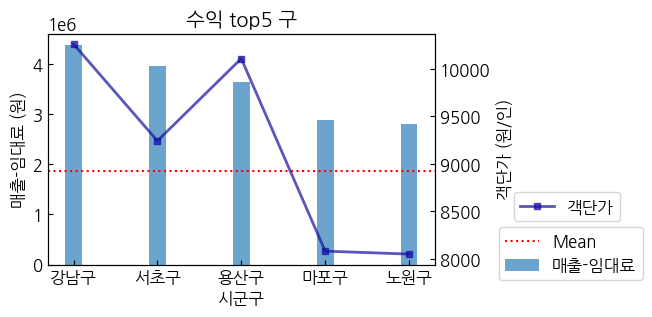

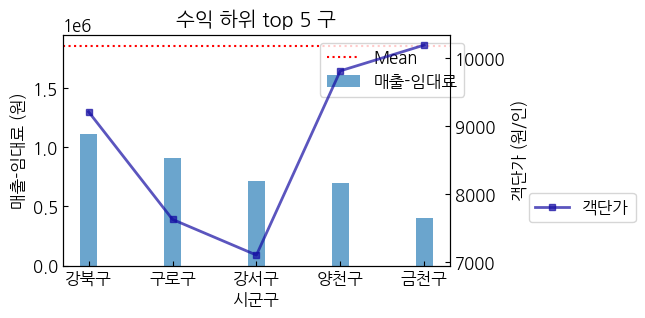

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

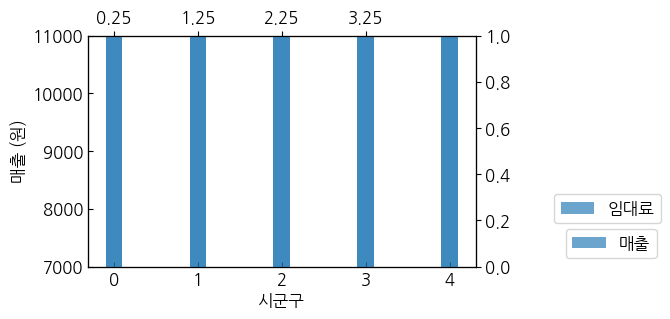

In [55]:
import plotly.express as px

fig = px.choropleth(df_3, geojson=seoul_geojson, color="매출-임대료",
                    locations=df_3.index, featureidkey="properties.name", labels="시군구명",
                    projection="mercator", color_continuous_scale='Blues')
fig.update_geos(fitbounds="locations", visible=False)
display(fig.update_layout(title_text = f'{service_name} 업종 (매출-임대료) 비교_{surface_area}평 기준', title_font_size = 20))
# fig.update_layout(title_text = f'{service_name} 업종 (매출-임대료) 비교_{surface_area}평 기준', title_font_size = 20, margin={"r":0,"t":0,"l":0,"b":0})

# 매출-임대료, 객단가(막대 및 꺾은선 그래프)


df_plt1 = df_3.sort_values(by='매출-임대료', ascending=False).head()
plt.style.use('default')
plt.rcParams['figure.figsize'] = (5, 3)
plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots()

ax1.bar(df_plt1['시군구'], df_plt1['매출-임대료'], color='#2c7fb8', alpha=0.7, width=0.2, label='매출-임대료')
ax1.axhline(df_3['매출-임대료'].mean(),label='Mean', c='r', ls=':')

ax1.set_xlabel('시군구')
ax1.set_ylabel('매출-임대료 (원)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(df_plt1['시군구'], df_plt1['평균 객단가'], '-s', color='#150da3', markersize=4, linewidth=2, alpha=0.7, label='객단가')
# ax2.set_ylim(7000, 11000)
ax2.set_ylabel('객단가 (원/인)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() - 10)
ax1.patch.set_visible(False)

ax1.legend(bbox_to_anchor=(1.2, 0, 0.3, 0.2), loc='upper center')
ax2.legend(bbox_to_anchor=(1.2, 0.15, 0.3, 0.2), loc='upper right')

plt.title('수익 top5 구')
plt.show()

#  하위 5

df_plt2 = df_3.sort_values(by='매출-임대료', ascending=False).tail()
plt.style.use('default')
plt.rcParams['figure.figsize'] = (5, 3)
plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots()

ax1.bar(df_plt2['시군구'], df_plt2['매출-임대료'], color='#2c7fb8', alpha=0.7, width=0.2, label='매출-임대료')
ax1.axhline(df_3['매출-임대료'].mean(),label='Mean', c='r', ls=':')

ax1.set_xlabel('시군구')
ax1.set_ylabel('매출-임대료 (원)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(df_plt2['시군구'], df_plt2['평균 객단가'], '-s', color='#150da3', markersize=4, linewidth=2, alpha=0.7, label='객단가')
# ax2.set_ylim(7000, 11000)
ax2.set_ylabel('객단가 (원/인)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() - 10)
ax1.patch.set_visible(False)

ax1.legend(bbox_to_anchor=(0.8, 0.9, 0.1, 0.1), loc='upper center')
ax2.legend(bbox_to_anchor=(1.2, 0.15, 0.3, 0.2), loc='upper right')

plt.title('수익 하위 top 5 구')
plt.show();


#  월평균 매출 top 5

df_plt3 = df_3.sort_values(by='월평균 매출', ascending=False).head()

bar_width = 0.25
index = np.arange(5)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (5, 3)
plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots()

ax1.bar(index, df_plt3['월평균 매출'], color='#2c7fb8', alpha=0.7, width=0.2, label='매출')
# ax1.set_ylim()
ax1.set_xlabel('시군구')
ax1.set_ylabel('매출 (원)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2 = ax1.twiny()
ax2.bar(index + bar_width, df_plt2['임대료'], color='#2c7fb8', alpha=0.7, width=0.2, label='임대료')
ax2.set_ylim(7000, 11000)
ax2.set_ylabel('임대료 (원)')
ax2.tick_params(axis='y', direction='in')

ax1.legend(bbox_to_anchor=(1.2, 0, 0.3, 0.2), loc='upper center')
ax2.legend(bbox_to_anchor=(1.2, 0.15, 0.3, 0.2), loc='upper right')

plt.xticks(np.arange(bar_width, 4 + bar_width, 1), df_plt3['시군구'])

plt.title('수익 하위 top 5 구')
plt.show();





In [57]:
pd.set_option('display.max_columns', None)
service_name = '커피'
surface_area = 20

df_2= get_service_seoul_data(service_name, df)

In [58]:
df_2

,서울_전체_매출,서울_전체_점포수,서울_전체_매출_1분기,서울_전체_매출_2분기,서울_전체_매출_3분기,서울_전체_매출_4분기,주중_매출합,주말_매출합,남성_매출합,여성_매출합,남성_객단가,여성_객단가,월_매출합,화_매출합,수_매출합,목_매출합,금_매출합,토_매출합,일_매출합,10대_매출합,20대_매출합,30대_매출합,40대_매출합,50대_매출합,60대 이상_매출합,10대_객단가,20대_객단가,30대_객단가,40대_객단가,50대_객단가,60대 이상_객단가,00~06_매출합,06~11_매출합,11~14_매출합,14~17_매출합,17~21_매출합,21~24_매출합
0,2.574983e+12,32049.0,5.333858e+11,6.855559e+11,6.626720e+11,6.933697e+11,1.935756e+12,6.392279e+11,1.025276e+12,1.257448e+12,6948.88724,7473.711937,3.498495e+11,3.777445e+11,3.939862e+11,3.954638e+11,4.187117e+11,3.498446e+11,2.893833e+11,4.269007e+10,7.265023e+11,6.637958e+11,4.406153e+11,2.887511e+11,1.203690e+11,6605.446074,6976.560235,7117.724389,7398.01823,7533.725621,8566.504011,7.979690e+09,3.661093e+11,8.800510e+11,6.599058e+11,5.615854e+11,9.935229e+10


ValueError: '' is not a valid value for color

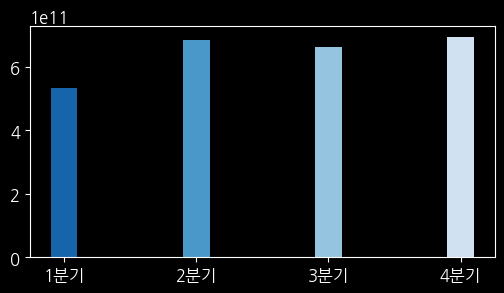

In [88]:
df_quarter = df_2[['서울_전체_매출_1분기', '서울_전체_매출_2분기', '서울_전체_매출_3분기',
                   '서울_전체_매출_4분기']]
df_quarter.columns = ['1분기', '2분기', '3분기','4분기']
df_quarter = df_quarter.T
df_quarter.columns = ['서울 전체 분기별 매출']


fig = plt.figure(figsize=(6,3)) ## Figure 생성 
# fig.set_facecolor('white') ## Figure 배경색 지정
 
colors = sns.color_palette('Blues_r', len(df_quarter['서울 전체 분기별 매출'])) ## 바 차트 색상
 
# xtick_label_position = df_quarter.index ## x축 눈금 라벨이 표시될 x좌표
# plt.xticks(xtick_label_position, df_quarter['서울 전체 분기별 매출']) ## x축 눈금 라벨 출력

plt.bar(df_quarter.index, df_quarter['서울 전체 분기별 매출'], color=colors,  width=0.2) ## 바차트 출력
plt.plot(xtick_label_position, df_quarter, color='',
         linestyle='--', marker='o') ## 선 그래프 출력
plt.title(f'분기별 매출 추이', fontsize=20)
plt.show()

In [ ]:
df_ = df_3[]

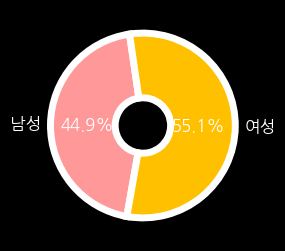

In [89]:
df_gender_sales = df_2[['남성_매출합', '여성_매출합']]
df_gender = df_2[['남성_객단가', '여성_객단가']]
df_gender_sales.columns = ['남성', '여성']
df_gender_sales = df_gender_sales.T

labels = df_gender_sales.index
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
fig = plt.pie(df_gender_sales[0], labels=labels, autopct='%.1f%%', startangle=260, 
                    counterclock=False, colors=colors, wedgeprops=wedgeprops);

In [78]:
fig

([<matplotlib.patches.Wedge at 0x2cbaddeac40>,
 [Text(-1.099880013428032, 0.016246724640756504, '남성'),
  Text(1.099880016470269, -0.016246518684358547, '여성')],
 [Text(-0.5999345527789265, 0.008861849804049, '44.9%'),
  Text(0.5999345544383284, -0.008861737464195569, '55.1%')])

In [76]:
df_day = df_2[['월_매출합', '화_매출합', '수_매출합', '목_매출합', '금_매출합', '토_매출합', '일_매출합',]]
df_day

,월_매출합,화_매출합,수_매출합,목_매출합,금_매출합,토_매출합,일_매출합
0,3.498495e+11,3.777445e+11,3.939862e+11,3.954638e+11,4.187117e+11,3.498446e+11,2.893833e+11


In [ ]:
df_quarter = df_sevral[['서울_전체_매출_1분기', '서울_전체_매출_2분기', '서울_전체_매출_3분기', '서울_전체_매출_4분기']]
            df_quarter.columns = ['1분기', '2분기', '3분기','4분기']
            df_quarter = df_quarter.T
            df_quarter.columns = ['서울 전체 분기별 매출']
            plt.rcParams['figure.figsize'] = (10, 4)
                
            fig, ax = plt.subplots() ## Figure 생성 
            # fig.set_facecolor('white') ## Figure 배경색 지정
            
            colors = sns.color_palette('Blues_r', len(df_quarter['서울 전체 분기별 매출'])) ## 바 차트 색상
 

            ax.bar(df_quarter.index, df_quarter['서울 전체 분기별 매출'], color=colors,  width=0.2) ## 바차트 출력
            ax.plot(df_quarter.index, df_quarter['서울 전체 분기별 매출'], color='b', linestyle='--', marker='o') ## 선 그래프 출력
            
            ax.title(f'분기별 매출 추이', fontsize=20)
            
            st.pyplot(fig)

In [91]:
df_several

,서울_전체_매출,서울_전체_점포수,서울_전체_매출_1분기,서울_전체_매출_2분기,서울_전체_매출_3분기,서울_전체_매출_4분기,주중_매출합,주말_매출합,남성_매출합,여성_매출합,남성_객단가,여성_객단가,월_매출합,화_매출합,수_매출합,목_매출합,금_매출합,토_매출합,일_매출합,10대_매출합,20대_매출합,30대_매출합,40대_매출합,50대_매출합,60대 이상_매출합,10대_객단가,20대_객단가,30대_객단가,40대_객단가,50대_객단가,60대 이상_객단가,00~06_매출합,06~11_매출합,11~14_매출합,14~17_매출합,17~21_매출합,21~24_매출합
0,2.574983e+12,32049.0,5.333858e+11,6.855559e+11,6.626720e+11,6.933697e+11,1.935756e+12,6.392279e+11,1.025276e+12,1.257448e+12,6948.88724,7473.711937,3.498495e+11,3.777445e+11,3.939862e+11,3.954638e+11,4.187117e+11,3.498446e+11,2.893833e+11,4.269007e+10,7.265023e+11,6.637958e+11,4.406153e+11,2.887511e+11,1.203690e+11,6605.446074,6976.560235,7117.724389,7398.01823,7533.725621,8566.504011,7.979690e+09,3.661093e+11,8.800510e+11,6.599058e+11,5.615854e+11,9.935229e+10


In [133]:
df_age['매출'] = df_several[['10대_매출합', '20대_매출합', '30대_매출합', '40대_매출합', '50대_매출합', '60대 이상_매출합']].T
df_age

,연령대별 매출,연령대별 객단가,매출
10대,4.269007e+10,6605.446074,NaN
20대,7.265023e+11,6976.560235,NaN
30대,6.637958e+11,7117.724389,NaN
40대,4.406153e+11,7398.018230,NaN
50대,2.887511e+11,7533.725621,NaN
60대 이상,1.203690e+11,8566.504011,NaN


In [134]:
df_age = df_several[['10대_매출합', '20대_매출합', '30대_매출합', '40대_매출합', '50대_매출합', '60대 이상_매출합']]
df_age_unit_price = df_several[['10대_객단가', '20대_객단가', '30대_객단가', '40대_객단가', '50대_객단가', '60대 이상_객단가']] 
cols = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
df_age.columns =cols
df_age_unit_price.columns = cols
df_age.index = ['연령대별 매|출']
df_age_unit_price.index = ['연령대별 객단가']
df_age = df_age.T
# df_age['연령대별 객단가'] = df_age_unit_price.T['연령대별 객단가']
df_age['연령대별 객단가'] = df_age_unit_price.T['연령대별 객단가']
df_age

,연령대별 매|출,연령대별 객단가
10대,4.269007e+10,6605.446074
20대,7.265023e+11,6976.560235
30대,6.637958e+11,7117.724389
40대,4.406153e+11,7398.018230
50대,2.887511e+11,7533.725621
60대 이상,1.203690e+11,8566.504011


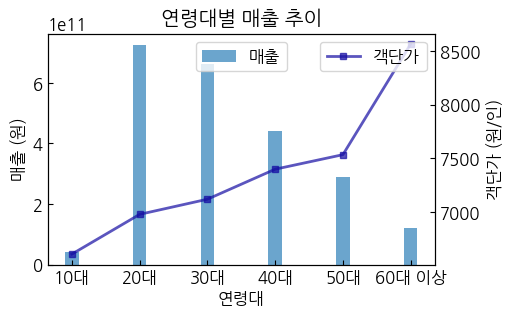

In [136]:
df_age = df_several[['10대_매출합', '20대_매출합', '30대_매출합', '40대_매출합', '50대_매출합', '60대 이상_매출합']]
df_age_unit_price = df_several[['10대_객단가', '20대_객단가', '30대_객단가', '40대_객단가', '50대_객단가', '60대 이상_객단가']] 
cols = ['10대', '20대', '30대', '40대', '50대', '60대 이상']
df_age.columns =cols
df_age_unit_price.columns = cols
df_age.index = ['연령대별 매출']
df_age_unit_price.index = ['연령대별 객단가']
df_age = df_age.T
# df_age['연령대별 객단가'] = df_age_unit_price.T['연령대별 객단가']
df_age['연령대별 객단가'] = df_age_unit_price.T['연령대별 객단가']

plt.style.use('default')
plt.rcParams['figure.figsize'] = (5, 3)
plt.rc('font', family='NanumGothic')
plt.rcParams['font.size'] = 12
fig, ax1 = plt.subplots()

ax1.bar(df_age.index, df_age['연령대별 매출'], color='#2c7fb8', alpha=0.7, width=0.2, label='매출')

ax1.set_xlabel('연령대')
ax1.set_ylabel('매출 (원)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(df_age.index, df_age['연령대별 객단가'], '-s', color='#150da3', markersize=4, linewidth=2, alpha=0.7, label='객단가')
# ax2.set_ylim(7000, 11000)
ax2.set_ylabel('객단가 (원/인)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() - 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper center')
ax2.legend(loc='upper right')

plt.title('연령대별 매출 추이')
plt.show();



Text(0.5, 1.0, '분기별 매출 추이')

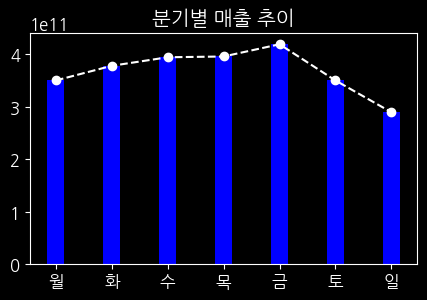

In [105]:
df_day = df_several[['월_매출합', '화_매출합', '수_매출합', '목_매출합', '금_매출합', '토_매출합', '일_매출합']]
df_day.columns = list('월화수목금토일')
df_day.index = ['매출']
df_day = df_day.T
df_day

fig, ax = plt.subplots()

ax.bar(df_day.index, df_day['매출'], color='blue',  width=0.3) ## 바차트 출력
ax.plot(df_day.index,  df_day['매출'], color='white', linestyle='--', marker='o') ## 선 그래프 출력
            
plt.title('분기별 매출 추이')

Text(0.5, 1.0, '시간대별 매출 추이')

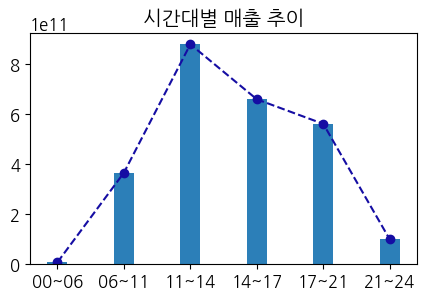

In [140]:
df_hour = df_several[['00~06_매출합', '06~11_매출합', '11~14_매출합', '14~17_매출합', '17~21_매출합', '21~24_매출합']]
df_hour.columns = ['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']
df_hour.index = ['매출']
df_hour = df_hour.T

fig, ax = plt.subplots()
ax.bar(df_hour.index, df_hour['매출'], color='#2c7fb8',  width=0.3) ## 바차트 출력
ax.plot(df_hour.index,  df_hour['매출'], color='#150da3', linestyle='--', marker='o') ## 선 그래프 출력
            
plt.title('시간대별 매출 추이')
st.pyplot(fig, width=400, height=150)